# Middle Eastern Video on Demand

Digital Marketing Analytics, Fall 2022, Final project

Name: Judy Yanbing Zhu

Due Date: Dec. 16, 2022

## Preparation

In [1]:
import numpy as np
import pandas as pd
import datetime

import scipy.stats as stats
import statsmodels.stats.api as sms
from scipy.stats import norm

# plot
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
subscribers = pd.read_pickle('subscribers')
subscribers_csv = pd.read_csv('Copy of subscribers.csv')
subscribers_xlsx = pd.read_excel('Copy of subscribers.xlsx')

engagement = pd.read_pickle ('engagement')
customer_service_reps = pd.read_pickle('customer_service_reps')

ad_spend = pd.read_excel('advertising_spend_data_without_header.xlsx')
channel_spend_grad = pd.read_csv('Copy of channel_spend_graduate.csv')

In [3]:
# data dimensions
print('subscribers pickle data shape',subscribers.shape)
print('subscribers csv',subscribers_csv.shape)
print('subscribers xlxs',subscribers_xlsx.shape)
print('engagement data shape',engagement.shape)
print('customer service reps data shape',customer_service_reps.shape)
print('ad_spend data shape',ad_spend.shape)
print('channel_spend_grad data shape',channel_spend_grad.shape)

subscribers pickle data shape (227628, 29)
subscribers csv (227628, 31)
subscribers xlxs (227628, 31)
engagement data shape (2585724, 9)
customer service reps data shape (2208643, 13)
ad_spend data shape (10, 9)
channel_spend_grad data shape (40, 3)


## Data Processing and Description

### Subscribers

In [4]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [5]:
subscribers_csv.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [6]:
sub_df = subscribers_csv.copy()
# check null values
sub_df.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

In [7]:
sub_df['subid'].is_unique

True

In [83]:
sub_df['current_sub_TF'].value_counts()

True     130250
False     97378
Name: current_sub_TF, dtype: int64

In [10]:
print(sub_df['country'].value_counts())
print(sub_df['language'].value_counts())

UAE    227628
Name: country, dtype: int64
ar    227628
Name: language, dtype: int64


In [11]:
intention_total = sub_df['intended_use'].value_counts()
intention_current = sub_df[sub_df['current_sub_TF'] == True]["intended_use"].value_counts()
intention =pd.concat([intention_total,intention_current],axis=1)
intention.columns = ["total number","converted number"]
intention["conversion rate(%)"] = intention["converted number"]/intention["total number"]*100
intention

,total number,converted number,conversion rate(%)
access to exclusive content,89039,72106,80.982491
replace OTT,69185,27324,39.494110
supplement OTT,26603,21598,81.186332
expand regional access,14025,2075,14.795009
expand international access,12978,1786,13.761751
other,7112,3154,44.347582
education,5137,667,12.984232


In [12]:
sub_df[(sub_df['current_sub_TF'] == True)&\
       (sub_df["intended_use"] == 'supplement OTT')]['package_type'].value_counts()

base        11758
enhanced     8563
economy      1277
Name: package_type, dtype: int64

In [13]:
sub_df[(sub_df['current_sub_TF'] == True)&\
       (sub_df["intended_use"] == ('supplement OTT' and'replace OTT'))]['package_type'].value_counts()

enhanced    13886
base        12618
economy       820
Name: package_type, dtype: int64

In [14]:
sub_df[(sub_df['current_sub_TF'] == False)&\
       (sub_df["intended_use"] == ('supplement OTT'and'replace OTT'))]['package_type'].value_counts()

base        24381
enhanced    13153
economy      4326
Name: package_type, dtype: int64

In [15]:
# convert account creation date format
sub_df.account_creation_date = pd.to_datetime(sub_df.account_creation_date, format='%Y-%m-%d')
sub_df.account_creation_date = sub_df.account_creation_date.apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day))


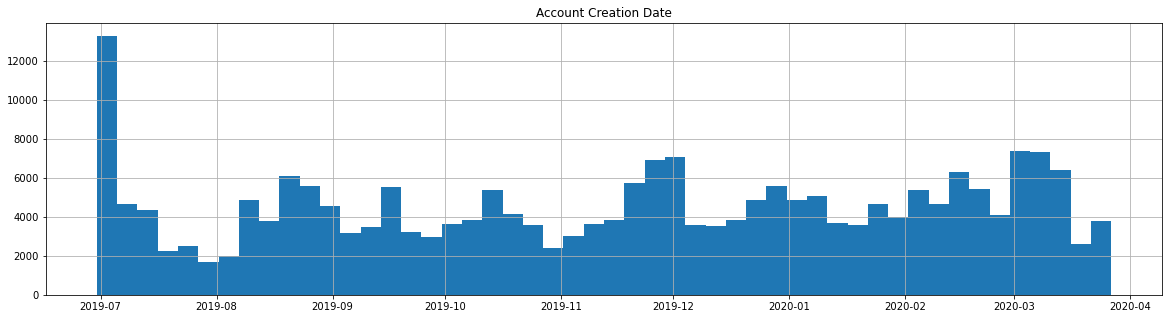

In [16]:
plt.figure(figsize=(20, 5))

sub_df['account_creation_date'].hist(bins=50)

plt.title('Account Creation Date')
plt.show()


In [17]:
sub_df['age'].value_counts().head()
# sub_df['age'].min()
# sub_df['age'].max()

50.0    6355
40.0    5509
60.0    5221
48.0    4651
47.0    4517
Name: age, dtype: int64

In [18]:
sub_df['package_type'].value_counts()

base        111464
enhanced     63241
economy      17349
Name: package_type, dtype: int64

In [19]:
sub_df['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [20]:
sub_df['num_trial_days'].value_counts()

14    227458
0        170
Name: num_trial_days, dtype: int64

In [21]:
sub_df['trial_completed'].value_counts()

True     200236
False     27392
Name: trial_completed, dtype: int64

In [22]:
genre_total = sub_df['preferred_genre'].value_counts()
genre_current = sub_df[sub_df['current_sub_TF'] == True]["preferred_genre"].value_counts()
genre =pd.concat([genre_total,genre_current],axis=1)
genre.columns = ["total number","converted number"]
genre["conversion rate(%)"] = genre["converted number"]/genre["total number"]*100
genre

,total number,converted number,conversion rate(%)
comedy,125129,93051,74.364056
drama,46872,21978,46.889401
regional,8990,4769,53.047831
international,6404,3389,52.920050
other,3907,1202,30.765293


### Engagement

In [23]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


### Customer Service Reps

In [24]:
customer_service_reps.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [25]:
# customer_service_reps['num_trial_days'].value_counts()
# customer_service_reps['billing_channel'].value_counts()

## A/B Testing
AB testing to understand what marketing strategies have been most effective to date
* 1-side hypothesis tests for low and high two different pricing plans respectively
* test strategy has higher conversion rate
* null: V_base = V_low, V_base = V_high
* H_a: V_base < V_low, V_base < V_high

### Converted Definition
paid after trial without refund for first period. 

In [26]:
# define conversion as current subscribers
sub_df = subscribers_csv.copy()
#sub_df = sub_df[sub_df['trial_completed'] == True]

In [27]:
# define conversion as first payment without refund
sub_df = subscribers.copy()

def convert(dfx):  
    if (dfx['paid_TF']  == True) and (dfx["refund_after_trial_TF"] == False):
        return True
    return False

sub_df['current_sub_TF']  = sub_df.apply(lambda dfx: convert(dfx), axis=1)

# convert account creation date format
sub_df.account_creation_date = pd.to_datetime(sub_df.account_creation_date, format='%Y-%m-%d')
sub_df.account_creation_date = sub_df.account_creation_date.apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day))


In [28]:
base_14_total = len(sub_df[sub_df['plan_type'] == 'base_uae_14_day_trial'])
base_14_current = len(sub_df[(sub_df['current_sub_TF'] == True) & (sub_df['plan_type'] == 'base_uae_14_day_trial')])
base_14_p = base_14_current/base_14_total
print("base pring plan conversion rate %3.2f%%" % (base_14_p*100))

low_0_total = len(sub_df[sub_df['plan_type'] == 'low_uae_no_trial'])
low_0_current = len(sub_df[(sub_df['current_sub_TF'] == True) & (sub_df['plan_type'] == 'low_uae_no_trial')])
low_0_p = low_0_current/low_0_total
print("low pricing plan conversion rate %3.2f%%" % (low_0_p*100))

high_14_total = len(sub_df[sub_df['plan_type'] == 'high_uae_14_day_trial'])
high_14_current = len(sub_df[(sub_df['current_sub_TF'] == True) & (sub_df['plan_type'] == 'high_uae_14_day_trial')])
high_14_p = high_14_current/high_14_total
print("high pricing plan conversion rate %3.2f%%" % (high_14_p*100))

base pring plan conversion rate 36.35%
low pricing plan conversion rate 79.64%
high pricing plan conversion rate 29.85%


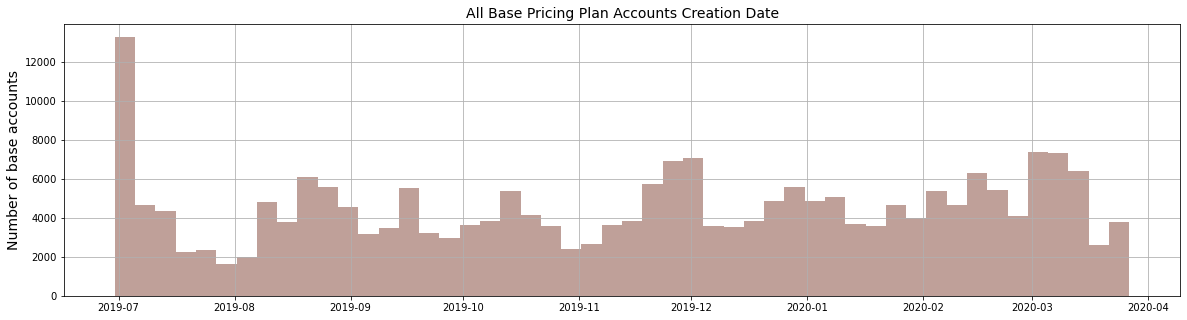

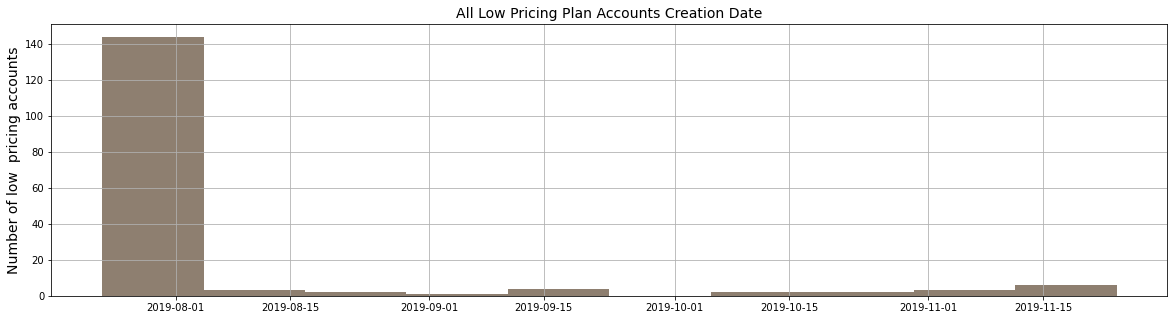

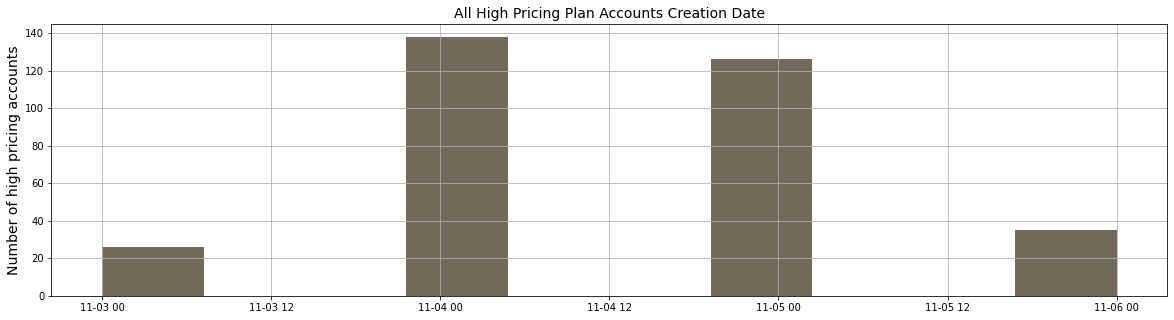

In [29]:
# ALL DATA
variantA_base_14 = sub_df.loc[sub_df['plan_type'] == 'base_uae_14_day_trial', ['account_creation_date','current_sub_TF']]
variantB_low_0 = sub_df.loc[sub_df['plan_type'] == 'low_uae_no_trial', ['account_creation_date','current_sub_TF']]
variantC_high_14 = sub_df.loc[sub_df['plan_type'] == 'high_uae_14_day_trial', ['account_creation_date','current_sub_TF']]

plt.figure(figsize=(20, 5))
variantA_base_14['account_creation_date'].hist(bins = 50, facecolor="#b08980",alpha=0.8)
plt.title('All Base Pricing Plan Accounts Creation Date',fontsize=14)
plt.ylabel("Number of base accounts",fontsize=14)
plt.show()

plt.figure(figsize=(20, 5))
variantB_low_0['account_creation_date'].hist(facecolor="#5f4933",alpha=0.7)
plt.title('All Low Pricing Plan Accounts Creation Date',fontsize=14)
plt.ylabel("Number of low  pricing accounts",fontsize=14)
plt.show()

plt.figure(figsize=(20, 5))
variantC_high_14['account_creation_date'].hist(facecolor="#382914",alpha=0.7)
plt.title('All High Pricing Plan Accounts Creation Date',fontsize=14)
plt.ylabel("Number of high pricing accounts",fontsize=14)
plt.show()


In [30]:
print("Earliest base account creation date",min(variantA_base_14['account_creation_date']))
print("Latest base account creation date",max(variantA_base_14['account_creation_date']))
print("Earliest low account creation date",min(variantB_low_0['account_creation_date']))
print("Latest low account creation date",max(variantB_low_0['account_creation_date']))
print("Earliest high account creation date",min(variantC_high_14['account_creation_date']))
print("Latest high account creation date",max(variantC_high_14['account_creation_date']))

Earliest base account creation date 2019-06-30
Latest base account creation date 2020-03-27
Earliest low account creation date 2019-07-23
Latest low account creation date 2019-11-24
Earliest high account creation date 2019-11-03
Latest high account creation date 2019-11-06


In [31]:
def calc_proportion(convert_TF):
    return sum(convert_TF)/len(convert_TF)


def calc_zscore(phat, p, n_f):
    return (phat-p)/np.sqrt(p*(1-p)/n_f)


def get_z_crit(alpha_f, num_sides_f):
    return norm.ppf(1-(alpha_f/num_sides_f))


def get_p_value(zscore_f, num_sides_f):
    return (1-norm.cdf(abs(zscore_f))) * num_sides_f

def reject_null(variantA_outcomes_f, variantB_outcomes_f, alpha_f, num_sides_f):
    p_hat_f = calc_proportion(variantB_outcomes_f)
    p_f = calc_proportion(variantA_outcomes_f)
    n_f = len(variantB_outcomes_f)
    z_score = calc_zscore(p_hat_f, p_f, n_f)
    p_value = get_p_value(z_score, num_sides_f)
    z_crit = get_z_crit(alpha_f, num_sides_f)
    return z_score > z_crit, z_score, p_value

In [32]:
# set parameters
alpha = 0.05    # significance level
num_sides = 1   # one-sided=1

# TRIAL DATA ONLY
low_trial_start_date = datetime.date(year=2019, month=7, day=20)
low_trial_end_date = datetime.date(year=2019, month=12, day=31)
low_base_14 = sub_df.loc[(sub_df['plan_type'] == 'base_uae_14_day_trial')& \
                         (sub_df['account_creation_date'] >= low_trial_start_date) & \
                         (sub_df['account_creation_date'] <= low_trial_end_date)
                         ,'current_sub_TF']
low_low_0 = sub_df.loc[(sub_df['plan_type'] == 'low_uae_no_trial')& \
                       (sub_df['account_creation_date'] >= low_trial_start_date) & \
                       (sub_df['account_creation_date'] <= low_trial_end_date)
                         ,'current_sub_TF']


high_trial_start_date = datetime.date(year=2019, month=7, day=20)
high_trial_end_date = datetime.date(year=2019, month=12, day=31)
high_base_14 = sub_df.loc[(sub_df['plan_type'] == 'base_uae_14_day_trial')& \
                          (sub_df['account_creation_date'] >= high_trial_start_date) & \
                          (sub_df['account_creation_date'] <= high_trial_end_date)
                         ,'current_sub_TF']
high_high_14 = sub_df.loc[(sub_df['plan_type'] == 'high_uae_14_day_trial')& \
                          (sub_df['account_creation_date'] >= high_trial_start_date) & \
                          (sub_df['account_creation_date'] <= high_trial_end_date)
                         ,'current_sub_TF']


In [33]:
# --- conduct tests for low pricing strategy
reject_null_test, z_score, p_value = reject_null(low_base_14, low_low_0, alpha, num_sides)
print('Conversion rate for base_14: %3.1f%%' % (calc_proportion(low_base_14)*100))
print('Conversion rate for low_0: %3.1f%%' % (calc_proportion(low_low_0)*100))
print('Using all low_0, reject null T/F: %s' % reject_null_test)
print('z-score = %3.2f and p-value = %3.1f%%' % (z_score, p_value*100))

Conversion rate for base_14: 36.8%
Conversion rate for low_0: 79.6%
Using all low_0, reject null T/F: True
z-score = 11.49 and p-value = 0.0%


In [34]:
# --- conduct tests for high pricing strategy
reject_null_test, z_score, p_value = reject_null(high_base_14, high_high_14, alpha, num_sides)
print('Conversion rate for base_14: %3.1f%%' % (calc_proportion(high_base_14)*100))
print('Conversion rate for high_14: %3.1f%%' % (calc_proportion(high_high_14)*100))
print('Using all high_14, reject null T/F: %s' % reject_null_test)
print('z-score = %3.2f and p-value = %3.1f%%' % (z_score, p_value*100))

Conversion rate for base_14: 36.8%
Conversion rate for high_14: 29.8%
Using all high_14, reject null T/F: False
z-score = -2.59 and p-value = 0.5%


In [15]:
print(sub_df[sub_df['plan_type'] == 'high_uae_14_day_trial']['monthly_price'].value_counts())
print(sub_df[sub_df['plan_type'] == 'high_uae_14_day_trial']['discount_price'].value_counts())

5.1013    325
Name: monthly_price, dtype: int64
5.0279    325
Name: discount_price, dtype: int64


In [16]:
print(sub_df[sub_df['plan_type'] == 'base_uae_14_day_trial']['monthly_price'].value_counts())
print(sub_df[sub_df['plan_type'] == 'base_uae_14_day_trial']['discount_price'].value_counts())

4.7343    227096
Name: monthly_price, dtype: int64
4.5141    227096
Name: discount_price, dtype: int64


In [17]:
print(5.0279/5.1013)
print(4.5141/4.7343)

0.9856115107913669
0.9534883720930232


## Attribution and Allocation
spend efficiency and effectiveness, supporting the advertising team’s budget allocation for the upcoming quarter

In [4]:
sub_df =subscribers_csv.copy()
#sub_df['attribution_technical'].value_counts()
#sub_df['attribution_survey'].value_counts()
#att_tech = sub_df.groupby(["attribution_technical", "current_sub_TF"])["subid"].count()
#att_survey = sub_df.groupby(["attribution_survey", "current_sub_TF"])["subid"].count()

In [36]:
channel_spend_grad.channel.value_counts()

bing        8
display     8
facebook    8
search      8
youtube     8
Name: channel, dtype: int64

In [37]:
channel_spend_grad.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


### Attribution Technical -- Last Interaction

In [5]:
ad_spend_sum = pd.DataFrame()
ad_spend_sum["spend_AED"] = channel_spend_grad.groupby(by="channel")["spend_AED"].sum()
ad_spend_sum

,spend_AED
channel,
bing,10800
display,366
facebook,113500
search,222500
youtube,8730


In [9]:
# attribution technical
ad_spend_sum['total_sub'] = ''
ad_spend_sum['total_sub']['bing'] = len(sub_df[sub_df['attribution_technical'] == 'bing'])
ad_spend_sum['total_sub']['display'] = len(sub_df[sub_df['attribution_technical'] == 'display'])
ad_spend_sum['total_sub']['facebook'] = len(sub_df[sub_df['attribution_technical'] == 'facebook'])
ad_spend_sum['total_sub']['search'] = len(sub_df[sub_df['attribution_technical'] == 'search'])
ad_spend_sum['total_sub']['youtube'] = len(sub_df[sub_df['attribution_technical'] == 'youtube'])

ad_spend_sum['current_sub'] = ''
ad_spend_sum['current_sub']['bing'] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'bing'])
ad_spend_sum['current_sub']['display'] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'display'])
ad_spend_sum['current_sub']['facebook'] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'facebook'])
ad_spend_sum['current_sub']['search'] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'search'])
ad_spend_sum['current_sub']['youtube'] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'youtube'])

ad_spend_sum['conversion'] = ad_spend_sum['current_sub']/ad_spend_sum['total_sub']

In [11]:
ad_spend_sum['avg_CAC'] = ad_spend_sum['spend_AED']/ad_spend_sum['current_sub']

print("CAC for five channels")
print('bing: %.2f'%ad_spend_sum['avg_CAC']['bing'])
print('display: %.2f'%ad_spend_sum['avg_CAC']['display'])
print('facebook: %.2f'%ad_spend_sum['avg_CAC']['facebook'])
print('search: %.2f'%ad_spend_sum['avg_CAC']['search'])
print('youtube: %.2f'%ad_spend_sum['avg_CAC']['youtube'])

CAC for five channels
bing: 18.82
display: 0.46
facebook: 2.75
search: 13.45
youtube: 11.96


In [12]:
ad_spend_sum

,spend_AED,total_sub,current_sub,conversion,avg_CAC
channel,,,,,
bing,10800,1146,574,0.500873,18.815331
display,366,1407,799,0.567875,0.458073
facebook,113500,80251,41236,0.513838,2.752449
search,222500,25306,16539,0.65356,13.45305
youtube,8730,913,730,0.799562,11.958904


### Allocation by month

In [111]:
sub_df = subscribers_csv.copy()
# convert account creation date format
sub_df.account_creation_date = pd.to_datetime(sub_df.account_creation_date, format='%Y-%m-%d')
sub_df.account_creation_date = sub_df.account_creation_date.apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day))

start_date = datetime.date(year=2019, month=10, day=1)
end_date = datetime.date(year=2019, month=10, day=31)
sub_df = sub_df.loc[(sub_df['account_creation_date'] >= start_date) & \
                    (sub_df['account_creation_date'] <= end_date),\
                    ('current_sub_TF','attribution_technical')]

ad_spend_mon = pd.DataFrame()
ad_spend_mon = channel_spend_grad.loc[(channel_spend_grad['date']==201910),]

# attribution technical
ad_spend_mon['total_sub'] = int()
ad_spend_mon.iat[0,3] = len(sub_df[sub_df['attribution_technical'] == 'bing'])
ad_spend_mon.iat[1,3] = len(sub_df[sub_df['attribution_technical'] == 'display'])
ad_spend_mon.iat[2,3] = len(sub_df[sub_df['attribution_technical'] == 'facebook'])
ad_spend_mon.iat[3,3] = len(sub_df[sub_df['attribution_technical'] == 'search'])
ad_spend_mon.iat[4,3] = len(sub_df[sub_df['attribution_technical'] == 'youtube'])

ad_spend_mon['current_sub'] = int()
ad_spend_mon.iat[0,4] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'bing'])
ad_spend_mon.iat[1,4] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'display'])
ad_spend_mon.iat[2,4] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'facebook'])
ad_spend_mon.iat[3,4] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'search'])
ad_spend_mon.iat[4,4] = len(sub_df[sub_df['current_sub_TF'] == True][sub_df['attribution_technical'] == 'youtube'])

ad_spend_mon['conversion'] = ad_spend_mon['current_sub']/ad_spend_mon['total_sub']
ad_spend_mon['marginal_CAC'] = ad_spend_mon['spend_AED']/ad_spend_mon['current_sub']

#ad_spend_mon

In [104]:
# 202002
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion,marginal_CAC
35,bing,202002,3700,303,181,0.597360,20.441989
36,display,202002,94,341,189,0.554252,0.497354
37,facebook,202002,14000,7988,4902,0.613671,2.855977
38,search,202002,44000,4300,2959,0.688140,14.869888
39,youtube,202002,2420,205,159,0.775610,15.220126


In [106]:
# 202001
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion,marginal_CAC
30,bing,202001,2100,172,93,0.540698,22.580645
31,display,202001,148,536,326,0.608209,0.453988
32,facebook,202001,11000,6289,4103,0.652409,2.680965
33,search,202001,41000,4073,2862,0.702676,14.325646
34,youtube,202001,4360,370,312,0.843243,13.974359


In [108]:
# 201912
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion,marginal_CAC
25,bing,201912,300,28,13,0.464286,23.076923
26,display,201912,31,112,65,0.580357,0.476923
27,facebook,201912,16000,9288,6035,0.649763,2.651201
28,search,201912,38000,3770,2701,0.716446,14.068863
29,youtube,201912,900,76,56,0.736842,16.071429


In [110]:
# 201911
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion,marginal_CAC
20,bing,201911,1300,103,55,0.533981,23.636364
21,display,201911,29,90,64,0.711111,0.453125
22,facebook,201911,23000,12995,8177,0.629242,2.812768
23,search,201911,25000,2510,1800,0.717131,13.888889
24,youtube,201911,550,47,35,0.744681,15.714286


In [112]:
# 201910
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion,marginal_CAC
15,bing,201910,1100,86,44,0.511628,25.000000
16,display,201910,19,50,19,0.380000,1.000000
17,facebook,201910,17000,9489,5356,0.564443,3.174010
18,search,201910,24000,2333,1463,0.627090,16.404648
19,youtube,201910,130,11,6,0.545455,21.666667


In [88]:
# 201909
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion
10,bing,201909,1000,84,37,0.440476
11,display,201909,13,12,6,0.500000
12,facebook,201909,10500,6129,3097,0.505303
13,search,201909,19000,1852,1118,0.603672
14,youtube,201909,100,2,1,0.500000


In [85]:
# 201908
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion
5,bing,201908,900,71,22,0.309859
6,display,201908,20,74,25,0.337838
7,facebook,201908,13000,9855,3767,0.382243
8,search,201908,18500,1939,976,0.503352
9,youtube,201908,180,15,9,0.600000


In [83]:
# 201907
ad_spend_mon

,channel,date,spend_AED,total_sub,current_sub,conversion
0,bing,201907,400,120,13,0.108333
1,display,201907,12,44,4,0.090909
2,facebook,201907,9000,10011,927,0.092598
3,search,201907,13000,1328,256,0.192771
4,youtube,201907,90,8,0,0.000000


## Churn Model
predict churn characters and price offer recommendations

In [126]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = 25

### Data Processing

In [115]:
df = subscribers_csv.copy()
#df.isnull().sum()

In [116]:
#df['months_per_bill_period'].value_counts()
# 4

#df['payment_period'].value_counts() 
# 0,1,2,3

#df['join_fee'].value_counts()
# have neg val

#df['num_ideal_streaming_services'].value_counts()
# -1 to 7, normally 2,3

#df[(df['age']>65)&(df['age']<75)]['age'].value_counts()
# a lot of unreal age numbers

In [117]:
df.drop(['Unnamed: 0','months_per_bill_period','account_creation_date','trial_end_date','payment_period',\
         'initial_credit_card_declined','last_payment','next_payment','cancel_date'],\
       axis = 1,inplace=True)

In [118]:
eng_df = engagement.copy()
eng_df.drop(['payment_period','date'],axis = 1,inplace=True)
eng_df = eng_df.groupby(by="subid").sum()
df = pd.merge(df, eng_df, left_on='subid', right_on='subid', how='left')

In [119]:
#customer_service_reps.head(10)

In [120]:
#cust_rep = customer_service_reps.copy()
#cust_df = pd.DataFrame()
#cust_df["customer_service_count"] = cust_rep.groupby(by="subid").count()
#df = pd.merge(df, cust_rep, left_on='subid', right_on='subid', how='left')

In [121]:
df.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,payment_type,num_trial_days,current_sub_TF,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,Standard Charter,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,NaN,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,NaN,14,False,True,2.0,2.0,13.0,13.0,0.0,1.0
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,NaN,14,False,True,NaN,NaN,NaN,NaN,NaN,NaN
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,NaN,14,True,True,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
age_median = df['age'].median()

df['age'] = df.age.apply(lambda x: age_median if x > 80 else x)
df = df.loc[(df["plan_type"] == "base_uae_14_day_trial")|
            (df["plan_type"] == "high_uae_14_day_trial")|
            (df["plan_type"] == "low_uae_no_trial"),:]

df['churn_TF'] = df.current_sub_TF.apply(lambda x: 1 if x == False else 0)
df.drop('current_sub_TF',axis = 1,inplace=True)
df = df.fillna(0)

In [123]:
df.isnull().sum()

subid                              0
package_type                       0
num_weekly_services_utilized       0
preferred_genre                    0
intended_use                       0
weekly_consumption_hour            0
num_ideal_streaming_services       0
age                                0
male_TF                            0
country                            0
attribution_technical              0
attribution_survey                 0
op_sys                             0
plan_type                          0
monthly_price                      0
discount_price                     0
join_fee                           0
language                           0
payment_type                       0
num_trial_days                     0
trial_completed                    0
app_opens                          0
cust_service_mssgs                 0
num_videos_completed               0
num_videos_more_than_30_seconds    0
num_videos_rated                   0
num_series_started                 0
c

### Dataset Split and Encoding

In [127]:
# split
df_train, df_test = model_selection.train_test_split(df, test_size=0.3, random_state=22)

y_train = df_train['churn_TF']
x_train = df_train.drop('churn_TF',axis = 1)
y_test = df_test['churn_TF']
x_test = df_test.drop('churn_TF',axis = 1)

In [128]:
# display numerical variables
numeric_features = list(x_train.columns[x_train.dtypes != object])

# display categorical variables
categorical_features = list(x_train.columns[x_train.dtypes == object])

# split categorical_features and numeric_features
x_train_cat = x_train.loc[:,categorical_features].astype('str') 
x_train_num = x_train.loc[:,numeric_features]

x_test_cat =  x_test.loc[:,categorical_features].astype('str')
x_test_num = x_test.loc[:,numeric_features]

# one-hot encoding for categorical variables
one_hot = OneHotEncoder(sparse=False)
x_train_cat = pd.DataFrame(one_hot.fit_transform(x_train_cat))
x_test_cat = pd.DataFrame(one_hot.transform(x_test_cat))

# normalize numerical features
scaler = MinMaxScaler()
x_train_num = pd.DataFrame(scaler.fit_transform(x_train_num))
x_test_num = pd.DataFrame(scaler.transform(x_test_num))

x_train_scale = pd.concat([x_train_cat,x_train_num],axis=1)
x_test_scale =  pd.concat([x_test_cat,x_test_num],axis=1)

### Logistic Regression Model

In [129]:
log_reg = LogisticRegression(random_state=22)
log_reg.fit(x_train_scale,y_train)

lr_predictions = log_reg.predict(x_test_scale)
lr_predictions_probs = log_reg.predict_proba(x_test_scale)[:, 1]
lr_auc = roc_auc_score(y_test, lr_predictions_probs)
print('Model auc: {0:0.6f}'.format(lr_auc))
print('Model accuracy score: {0:0.6f}'.format(accuracy_score(y_test, lr_predictions)))

Model auc: 0.945862
Model accuracy score: 0.874043


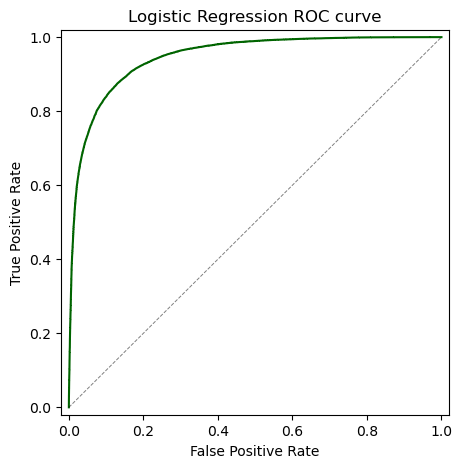

In [131]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, lr_predictions_probs)
plt.plot(fpr, tpr, color='darkgreen')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC curve')

plt.show()

### CatBoost

In [130]:
np.random.seed(22)
categorical_features_indices = np.where(x_train.dtypes != np.float64)[0]

cb_model = CatBoostClassifier(
    eval_metric = 'AUC',
    custom_loss=['Accuracy'],
    random_seed=22,
    logging_level='Silent'
)

cb_model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
    plot=True
);

cb_predictions = cb_model.predict(x_test)
cb_predictions_probs = cb_model.predict_proba(x_test)[:,1]
print("The test AUC score is %f." % (roc_auc_score(y_test, cb_predictions_probs)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

The test AUC score is 0.955134.


In [ ]:
cb_predictions_probs

In [134]:
cb_model.get_feature_importance()

array([1.34943548e-03, 5.52242999e+00, 1.77278600e+01, 9.23339403e+00,
       1.49668067e+01, 2.88235551e+00, 2.32104618e+00, 8.70472416e+00,
       2.16045750e+00, 0.00000000e+00, 1.36981588e+00, 1.32978035e+01,
       3.28281444e-01, 1.61968710e-01, 4.93464709e-03, 3.54058750e-03,
       2.46669049e+00, 0.00000000e+00, 4.38969575e-01, 3.60181327e-03,
       1.51739314e+01, 5.77192708e-01, 3.29443383e-01, 6.37525061e-01,
       1.06259568e+00, 2.34575909e-01, 3.88705665e-01])

In [135]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under cb predictions for select threshold
    df_f['make_offer_cb'] = (df_f['prob_churn_cb'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_cb'] = (df_f['make_offer_cb'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_cb_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_cb'], 'price_cb_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price
    
    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1
    return df_f, df_impact

def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [136]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_logit'] = lr_predictions_probs
#df_test['prob_churn_dt'] = dt_predictions_probs
df_test['prob_churn_cb'] = cb_predictions_probs

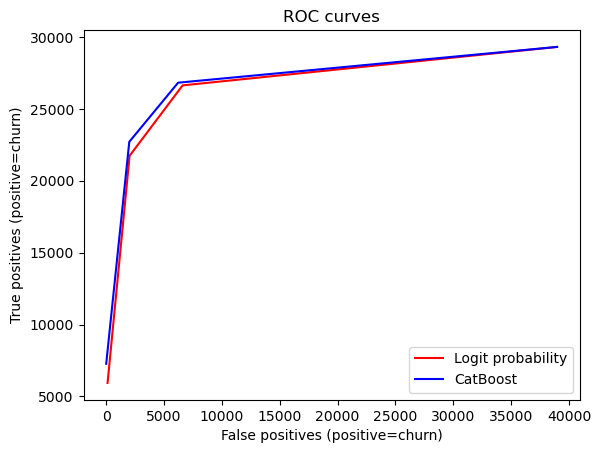

In [137]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
#dt_conf_mat, dt_false_positives, dt_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_dt'])
cb_conf_mat, cb_false_positives, cb_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_cb'])

# plot ROC curves
# fig = plt.figure(figsize=(12, 8))
ax1 = plt.gca()
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
#ax1.plot(dt_false_positives, dt_true_positives, 'g-')
ax1.plot(cb_false_positives, cb_true_positives, 'b-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Logit probability','CatBoost'])
#plt.legend(labels=['Logit probability','Decision tree','CatBoost'])

### A. Discount 5% off + acceptance rate 30% + threshold 0.5 (Current)

In [138]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.05
cases = ['no_offer', 'logit_offer', 'cb_offer']

In [140]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind


# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

              subs       revenue lift_from_no_offer
no_offer     38970    184495.671                0.0
logit_offer  46279   216475.8675           0.173338
cb_offer     46422  217160.44728           0.177049


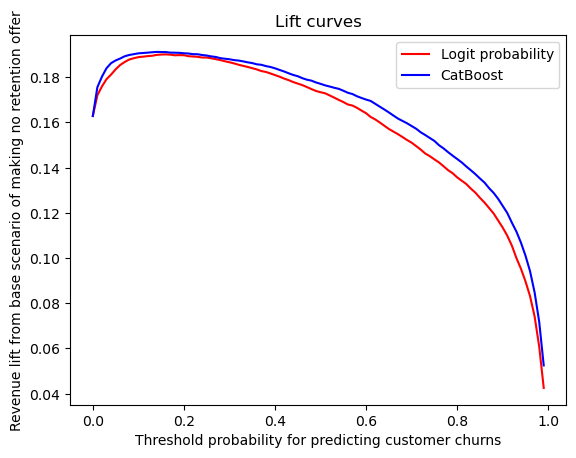

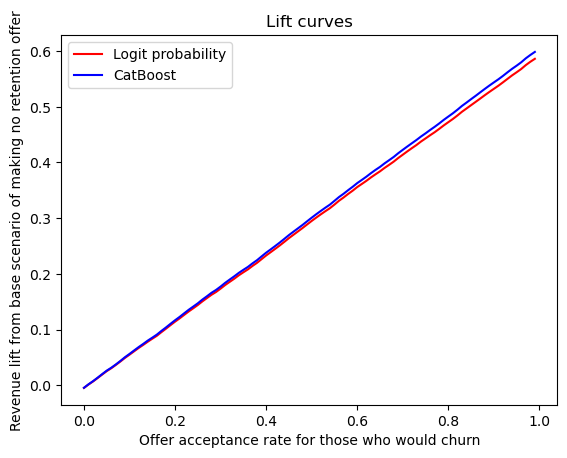

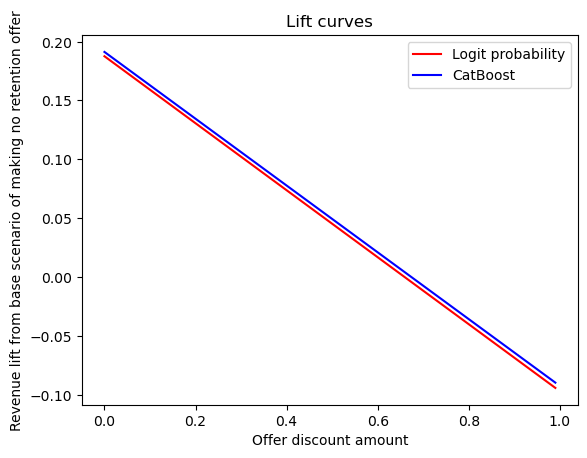

In [141]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['cb_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Logit probability','CatBoost'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['cb_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Logit probability','CatBoost'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['cb_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Logit probability','CatBoost'])

### B. Discount 10% off + acceptance rate 20% + threshold 0.3 (lower as A)

In [142]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.2
threshold = 0.3
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.1
cases = ['no_offer', 'logit_offer', 'cb_offer']

              subs       revenue lift_from_no_offer
no_offer     38970    184495.671                0.0
logit_offer  44326  203856.59085            0.10494
cb_offer     44345  204174.73581           0.106664


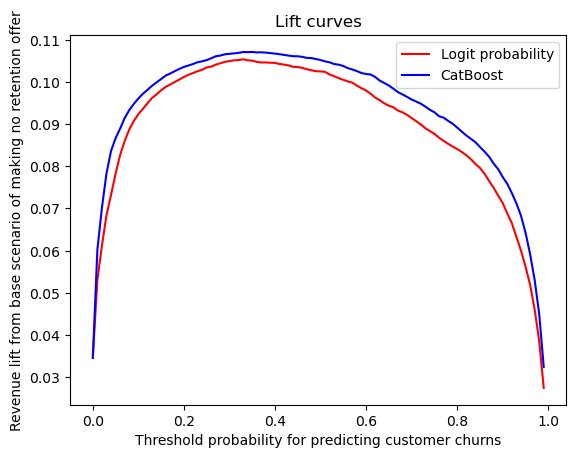

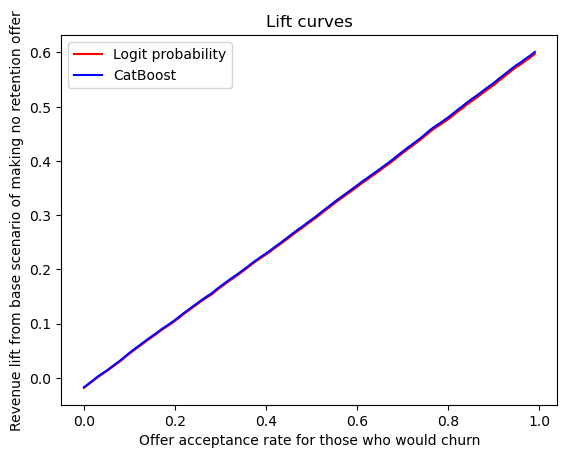

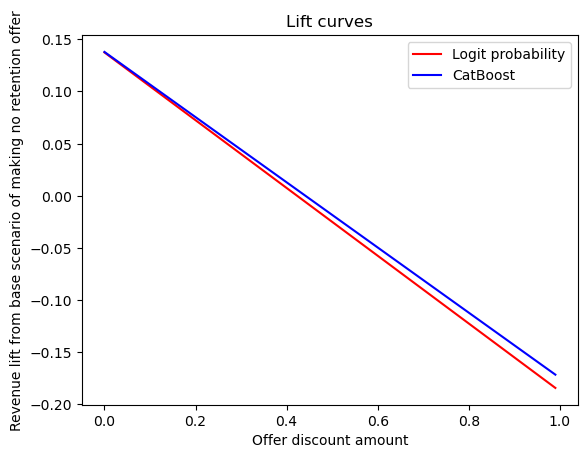

In [143]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

print(df_impact)

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['cb_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Logit probability','CatBoost'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['cb_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Logit probability','CatBoost'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['cb_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Logit probability','CatBoost'])

### C. Discount 5% off (same as A) + acceptance rate 30%(same as A)  + threshold 0.3 (lower than A)

In [149]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.3
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.05
cases = ['no_offer', 'logit_offer', 'cb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

              subs        revenue lift_from_no_offer
no_offer     38970     184495.671                0.0
logit_offer  47016  218953.089975           0.186765
cb_offer     47024   219107.66487           0.187603


### D. Discount 5% off (same as A) + acceptance rate 30%(same as A)  + threshold 0.18 (lower than A)

In [150]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.18
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.05
cases = ['no_offer', 'logit_offer', 'cb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

              subs        revenue lift_from_no_offer
no_offer     38970     184495.671                0.0
logit_offer  47353  219562.394385           0.190068
cb_offer     47360  219823.727745           0.191484


### E. Discount 5% off (same as A) + acceptance rate 30%(same as A)  + threshold 0.19 (lower than A)

In [151]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.19
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.05
cases = ['no_offer', 'logit_offer', 'cb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

              subs        revenue lift_from_no_offer
no_offer     38970     184495.671                0.0
logit_offer  47476  220197.264015           0.193509
cb_offer     47466   220374.56355            0.19447


### F. Discount 10% off + acceptance rate 20% + threshold 0.33 (higher than B)

In [157]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.2
threshold = 0.33
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.1
cases = ['no_offer', 'logit_offer', 'cb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

              subs       revenue lift_from_no_offer
no_offer     38970    184495.671                0.0
logit_offer  44387  204445.06434           0.108129
cb_offer     44431  204818.60061           0.110154


### G. Discount 10% off + acceptance rate 40%(higher than F) + threshold 0.4 (higher than F)

In [158]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.4
threshold = 0.4
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.1
cases = ['no_offer', 'logit_offer', 'cb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

              subs       revenue lift_from_no_offer
no_offer     38970    184495.671                0.0
logit_offer  49262  225828.00372           0.224029
cb_offer     49414  226599.22119           0.228209


### H. Discount 5% off + acceptance rate 40% + threshold 0.18 

In [160]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.4
threshold = 0.18
base_price = subscribers_csv['monthly_price'].median()
discount_amount = 0.05
cases = ['no_offer', 'logit_offer', 'cb_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

print(df_impact)

              subs        revenue lift_from_no_offer
no_offer     38970     184495.671                0.0
logit_offer  50060   231737.35698           0.256059
cb_offer     50042  231886.250715           0.256866
